In [55]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Arrays for storing temperatures, function values, iterations, and states
temperatures = []
function_values = []
iterations = []
states = []

# Initial parameters
L_0 = 500  # Fixed Markov chain length


# Define the two-variable function
def f(x, y):
    return (x - 3)**2 + (y + 2)**2 + 5

def simulate(temp):
    current_x = random.uniform(-3, 4)
    current_y = random.uniform(-3, 4)
    best_solution = (current_x, current_y)
    best_value = f(current_x, current_y)
    optimal_solution = best_solution
    optimal_value = best_value
    L_i = L_0

    for i in range(1, 1501):
        # Update the Markov chain length
        #L_i = L_0 * (1 + beta * math.log(1 + i))
        trails = 1
        while trails < L_i:
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)
            delta_E = f(new_x, new_y) - f(current_x, current_y)

            if delta_E <= 0 or random.uniform(0, 1) < math.exp(-delta_E / temp):
                current_x = new_x
                current_y = new_y
                if f(current_x, current_y) < best_value:
                    best_solution = (current_x, current_y)
                    best_value = f(current_x, current_y)
            trails += 1

        if f(optimal_solution[0], optimal_solution[1]) > f(best_solution[0], best_solution[1]):
            optimal_solution = best_solution
            optimal_value = best_value

        states.append(best_solution)
        function_values.append(best_value)
        temperatures.append(temp)
        iterations.append(i)

        # Decrease the temperature
        delta_T = temp * 0.05
        temp -= delta_T

    return optimal_solution, optimal_value, states, function_values, temperatures, iterations


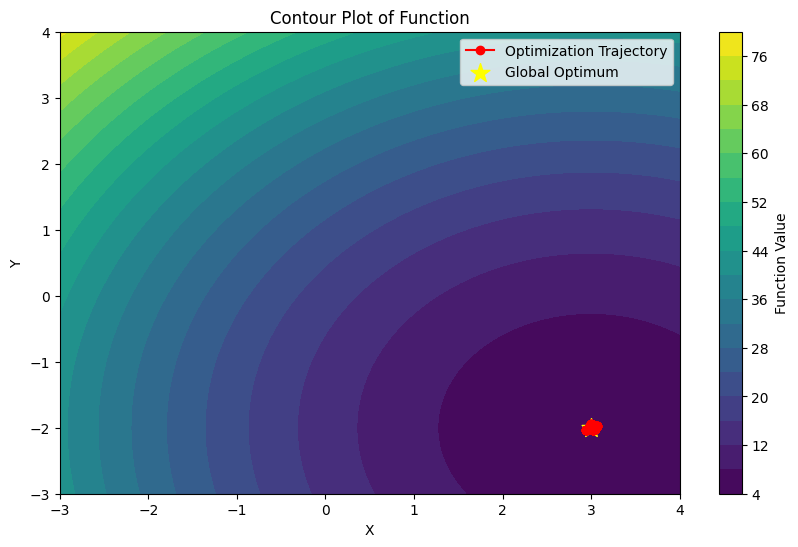

Optimal solution: (3.0008018191285553, -2.003273121045595)
Function value at optimal solution: 5.000011356235294


In [57]:
# Simulate
best_solution, best_value, states, function_values,temperatures,iterations= simulate(1500)

# Plot contour plot of the function
x = np.linspace(-3, 4, 100)
y = np.linspace(-3, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(label='Function Value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of Function')

# Overlay the trajectory
x_traj = [s[0] for s in states]
y_traj = [s[1] for s in states]
plt.plot(x_traj, y_traj, marker='o', color='red', label='Optimization Trajectory')
plt.scatter(best_solution[0], best_solution[1], color='yellow', marker='*', s=200, label='Global Optimum')
plt.legend()

plt.show()

print("Optimal solution:", best_solution)
print("Function value at optimal solution:", best_value)

#500 iteratiom
Optimal solution: (3.008731686727544, -2.0028789939923737)
Function value at optimal solution: 5.000084530959516

#1000
Optimal solution: (3.003546855570268, -1.9995116097459398)
Function value at optimal solution: 5.000012818709477

#1500
Optimal solution: (3.0008018191285553, -2.003273121045595)
Function value at optimal solution: 5.000011356235294





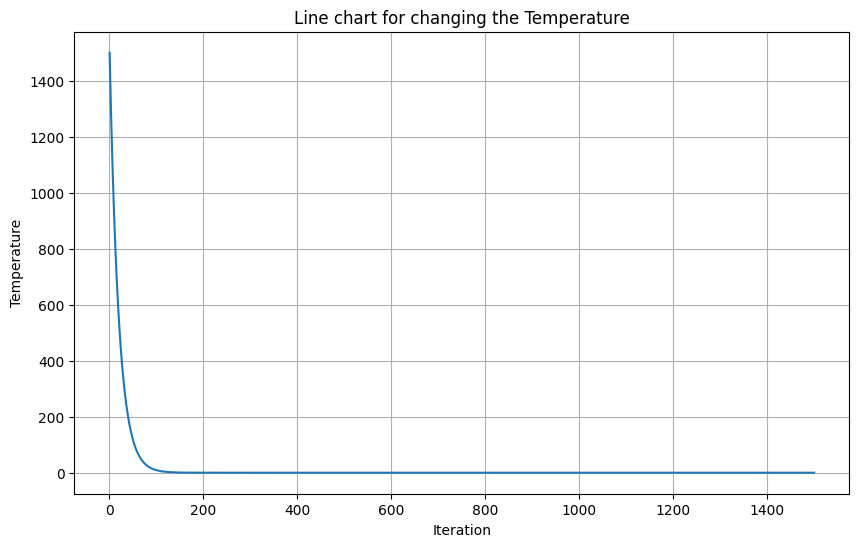

In [46]:
# Draw the plot for temperature vs iteration
plt.figure(figsize = (10,6))
plt.plot(iterations,temperatures)
plt.title("Line chart for changing the Temperature")
plt.xlabel("Iteration")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

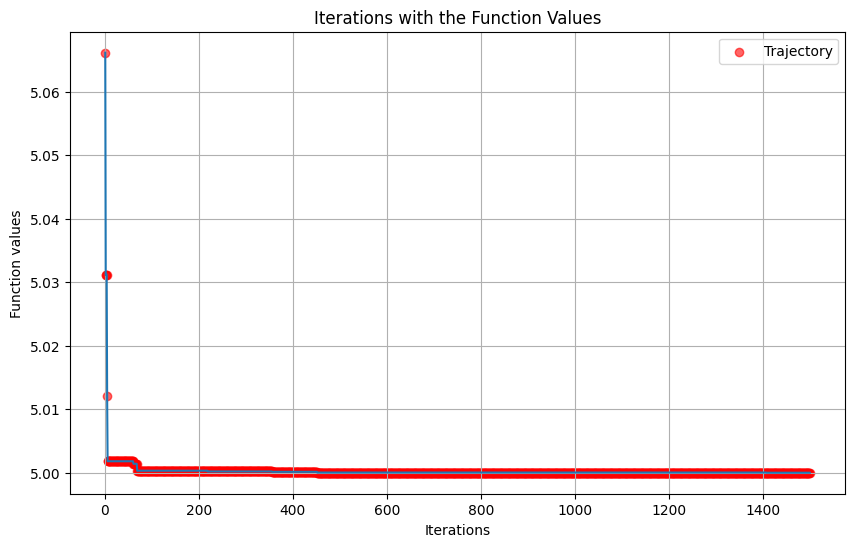

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(iterations,function_values)
plt.scatter(iterations,function_values, c='red', label='Trajectory', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('Function values')
plt.title('Iterations with the Function Values')
plt.legend()
plt.grid(True)
plt.show()

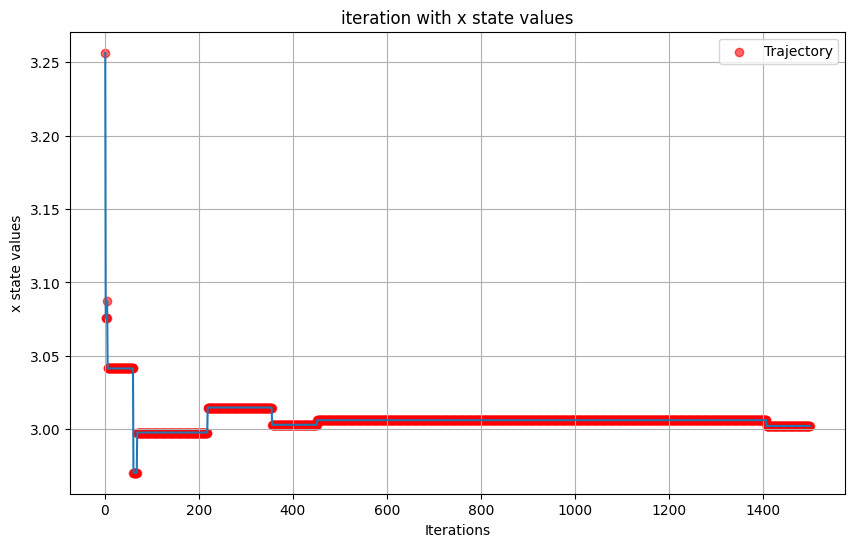

In [48]:
x = [s[0] for s in states]
y = [s[1] for s in states]
z = [f(s[0], s[1]) for s in states]
plt.figure(figsize=(10, 6))
plt.plot(iterations,x)
plt.scatter(iterations,x, c='red', label='Trajectory', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('x state values')
plt.title('iteration with x state values')
plt.legend()
plt.grid(True)
plt.show()

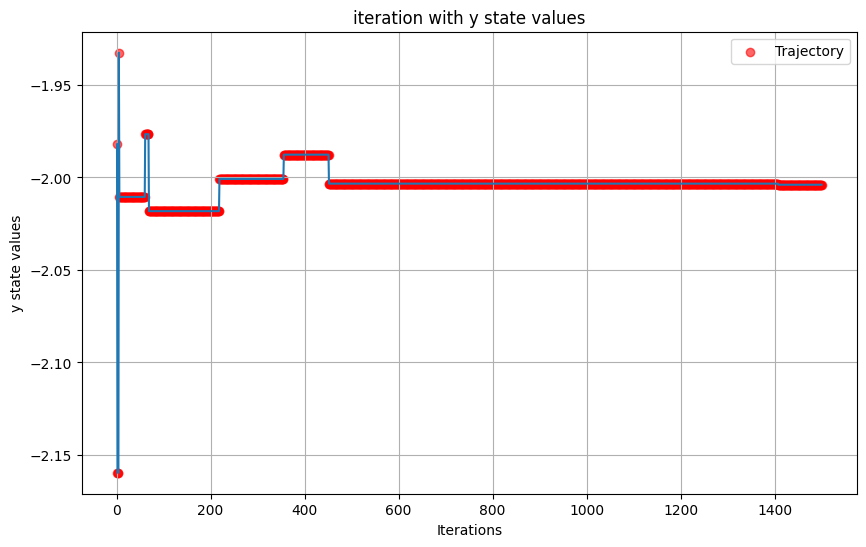

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(iterations,y)
plt.scatter(iterations,y, c='red', label='Trajectory', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('y state values')
plt.title('iteration with y state values')
plt.legend()
plt.grid(True)
plt.show()

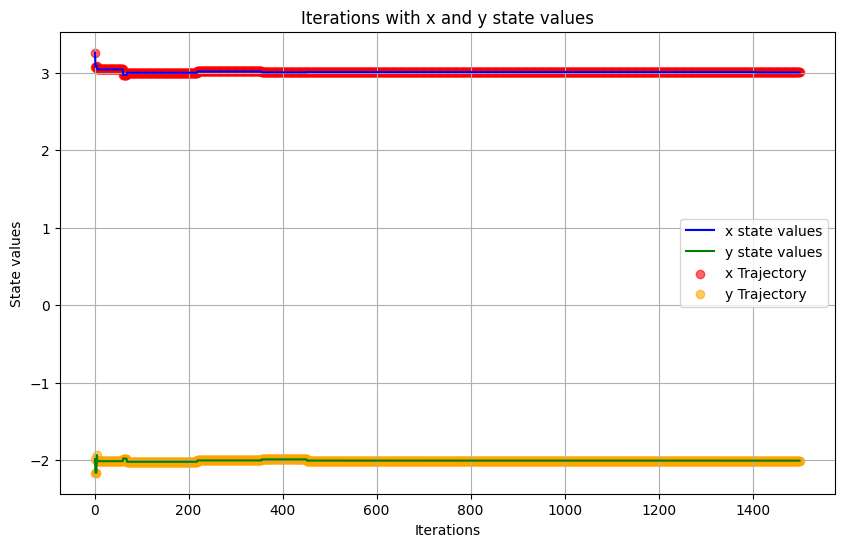

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(iterations, x, label='x state values', color='blue')
plt.plot(iterations, y, label='y state values', color='green')
plt.scatter(iterations, x, c='red', label='x Trajectory', alpha=0.6)
plt.scatter(iterations, y, c='orange', label='y Trajectory', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('State values')
plt.title('Iterations with x and y state values')
plt.legend()
plt.grid(True)
plt.show()